<a href="https://colab.research.google.com/github/JesseJames50/Analise-Dados-Financeiros/blob/main/suporte_e_resist%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação das bibliotecas
!pip install -q yfinance
!pip install --upgrade -q mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


In [2]:
# Importação das bibliotecas
import yfinance as yf
import mplfinance as mpf

In [3]:
# Baixando os dados da ação
ticker = 'PETR4.SA'
start = '2021-01-01'
end = '2021-09-15'
df = yf.download(ticker, start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,10.592276,74719700
2021-01-05,28.900000,30.180000,28.240000,30.040001,11.006294,95181100
2021-01-06,30.160000,30.900000,30.049999,30.100000,11.028276,96562500
2021-01-07,30.340000,31.150000,30.340000,31.000000,11.358027,56171300
2021-01-08,31.459999,31.760000,30.350000,31.120001,11.401993,67136300
...,...,...,...,...,...,...
2021-09-08,26.290001,26.350000,24.790001,24.969999,10.019848,80378400
2021-09-09,25.080000,25.879999,24.139999,25.500000,10.232526,156617100
2021-09-10,26.020000,26.139999,25.330000,25.340000,10.168322,78379900


## Identificando os fractais
Dessa forma, para identificar uma linha de resistência (is_resistance), o candle de sinal deverá ter máxima maior que o candle anterior (i-1) e porterior (i+1) a ele, assim como ambos deverão apresentar máxima maior que os candles de suas extremidades (i-2 e i+2, respectivamente). A mesma lógica se aplica para is_support.

In [4]:
def is_resistance(df,i):
  support = (df['High'][i] > df['High'][i-1]
             and df['High'][i] > df['High'][i+1]
             and df['High'][i+1] > df['High'][i+2]
             and df['High'][i-1] > df['High'][i-2])
  return support

def is_support(df,i):
  support = (df['Low'][i] < df['Low'][i-1]
             and df['Low'][i] < df['Low'][i+1]
             and df['Low'][i+1] < df['Low'][i+2]
             and df['Low'][i-1] < df['Low'][i-2])
  return support

# Posicionando as linhas de suporte e resistência
O alines recebe um par de tuplas com coordenadas (x, y), onde a primeira tupla representa o ponto de início da linha e a segunda tupla, o ponto final da linha. No nosso caso, o primeiro ponto será o dia onde o suporte ou resistência foi observado, e o último ponto será o último dia do nosso dataset.

In [6]:
# coordenadas é uma lista de uma lista de duas tuplas
# a primeira tupla tem o índice da vela sinal como 1º argumento e o preço como 2º
# a segunda tupla tem o último índice como primeiro argumento para desenhar o suporte/resistência
# linha até o final do gráfico

coordinates = []
for i in range(2, df.shape[0] - 2):
  if is_support(df, i):
    coordinates.append([
      (df.index[i], df['Low'][i]), # If support, plot a horizontal line from the low
      (max(df.index),df['Low'][i])
    ])
  elif is_resistance(df, i):
    coordinates.append([
      (df.index[i],df['High'][i]), # If resistance, plot a horizontal line from the high
      (max(df.index),df['High'][i])
    ])

coordinates[:5]

[[(Timestamp('2021-01-20 00:00:00'), 29.1200008392334),
  (Timestamp('2021-09-14 00:00:00'), 29.1200008392334)],
 [(Timestamp('2021-02-18 00:00:00'), 30.920000076293945),
  (Timestamp('2021-09-14 00:00:00'), 30.920000076293945)],
 [(Timestamp('2021-02-22 00:00:00'), 21.399999618530273),
  (Timestamp('2021-09-14 00:00:00'), 21.399999618530273)],
 [(Timestamp('2021-02-25 00:00:00'), 25.25),
  (Timestamp('2021-09-14 00:00:00'), 25.25)],
 [(Timestamp('2021-03-03 00:00:00'), 20.479999542236328),
  (Timestamp('2021-09-14 00:00:00'), 20.479999542236328)]]

# Plotando o gráfico com os suportes e resistências
O objetivo é plotar um gráfico de candlestick e suas linhas horizontais, teremos que chamar a função mpf.plot mais de uma vez para o mesmo gráfico (ax2 = ax1.twinx()).

A primeira vez que chamaremos a função será para plotar o gráfico de candlestick (type='candle') com o estilo yahoo, onde os candles que fecharam positivo são representados por verde e os que fecharam negativo, por vermelho. Você pode explorar diversos estilos e tipos de gráficos disponíveis na documentação.

Em seguida, iteraremos sobre todas as coordenadas presentes em coordinates, a fim de plotar as linhas horizontas.

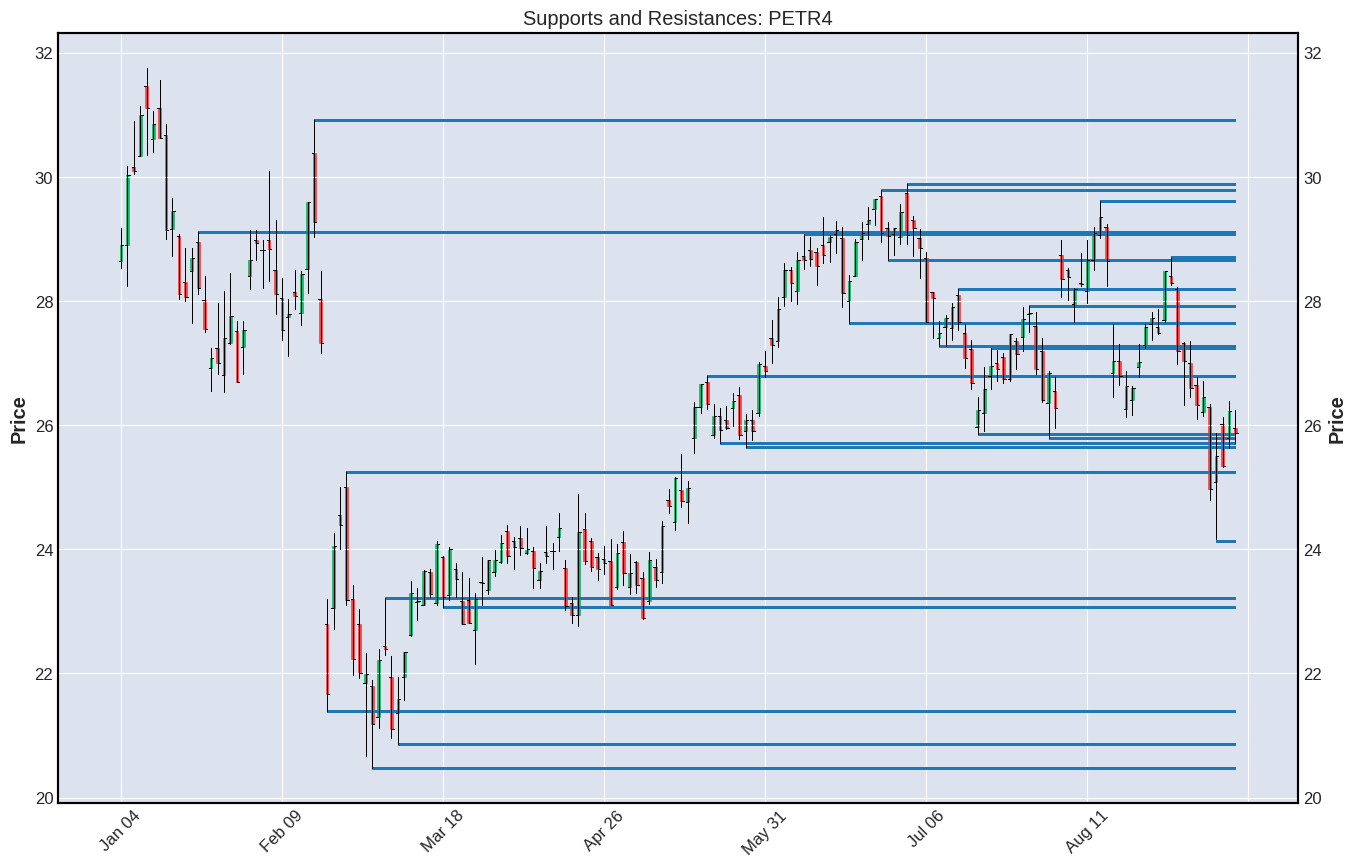

In [7]:
def plot_all(coordinates):

  fig = mpf.figure(figsize=(16, 10))
  title = f"Supports and Resistances: {ticker.replace('.SA', '')}"
  ax1 = fig.subplot(title=title)
  ax2 = ax1.twinx()

  mpf.plot(df,
           ax=ax1,
           style='yahoo',
           type='candle',
           ylabel='Price')

  for coordinate in coordinates:
    mpf.plot(df, alines=(coordinate), ax=ax2)

plot_all(coordinates)

# Refinando o nosso gráfico
Existem diversas formas de se calcular o tamanho esperado de um candle (Average True Range ou ATR sendo um deles). Por simplicidade, vamos definir o tamanho médio dos candles, ou seja, a média da diferença entre a máxima e a mínima dos candles.

Dessa maneira, se a diferença entre duas linhas, seja ela de suporte ou resistência, for menor que a média dos corpos dos candles, quer dizer que elas estão muito próximas entre si e pertencem à mesma zona.

In [8]:
import numpy as np
avg_candle_size =  np.mean(df['High'] - df['Low'])
avg_candle_size

0.8210919478843952

A função a seguir verificará se um dado preço (price) está distante o suficiente de uma lista de suportes e resistências (levels). Para medir a distância, utilizaremos a variável delta, que no nosso caso será o avg_candle_size.

A função is_far_from_level seguirá a seguinte lógica: se o preço for menor que o avg_candle_size de pelo menos uma linha de suporte ou resistência (level), consideramos que os preços estão próximos e assim ele é descartado. Por outro lado, caso o preço não esteja próximo o suficiente de nenhum suporte ou resistência, esse preço será considerado distante e será adicionado a lista no_noise_levels.

In [9]:
def is_far_from_level(price, levels, delta):
    is_far = True
    for level in levels:
        if (abs(level - price) < delta):
            is_far = False
            break
    return is_far

Adicionamos as novas coordenadas à uma nova lista coordinates para sermos capazes de plotar as linhas horizontais.

In [10]:
no_noise_levels = []
coordinates = []

# We skip the first and the last 2 data points once we need at least 5 candles
# to form the patter
for i in range(2, df.shape[0] - 2):

    if is_support(df, i):
        price = df['Low'][i]
        if is_far_from_level(price, no_noise_levels, avg_candle_size):
            no_noise_levels.append(price)
            coordinates.append([
                (df.index[i], price), (max(df.index), price)
            ])

    elif is_resistance(df,i):
        price = df['High'][i]
        if is_far_from_level(price, no_noise_levels, avg_candle_size):
            no_noise_levels.append(price)
            coordinates.append([
                (df.index[i], price), (max(df.index), price)
            ])

coordinates

[[(Timestamp('2021-01-20 00:00:00'), 29.1200008392334),
  (Timestamp('2021-09-14 00:00:00'), 29.1200008392334)],
 [(Timestamp('2021-02-18 00:00:00'), 30.920000076293945),
  (Timestamp('2021-09-14 00:00:00'), 30.920000076293945)],
 [(Timestamp('2021-02-22 00:00:00'), 21.399999618530273),
  (Timestamp('2021-09-14 00:00:00'), 21.399999618530273)],
 [(Timestamp('2021-02-25 00:00:00'), 25.25),
  (Timestamp('2021-09-14 00:00:00'), 25.25)],
 [(Timestamp('2021-03-03 00:00:00'), 20.479999542236328),
  (Timestamp('2021-09-14 00:00:00'), 20.479999542236328)],
 [(Timestamp('2021-03-05 00:00:00'), 23.219999313354492),
  (Timestamp('2021-09-14 00:00:00'), 23.219999313354492)],
 [(Timestamp('2021-05-18 00:00:00'), 26.799999237060547),
  (Timestamp('2021-09-14 00:00:00'), 26.799999237060547)],
 [(Timestamp('2021-06-18 00:00:00'), 27.639999389648438),
  (Timestamp('2021-09-14 00:00:00'), 27.639999389648438)],
 [(Timestamp('2021-09-09 00:00:00'), 24.139999389648438),
  (Timestamp('2021-09-14 00:00:00'),

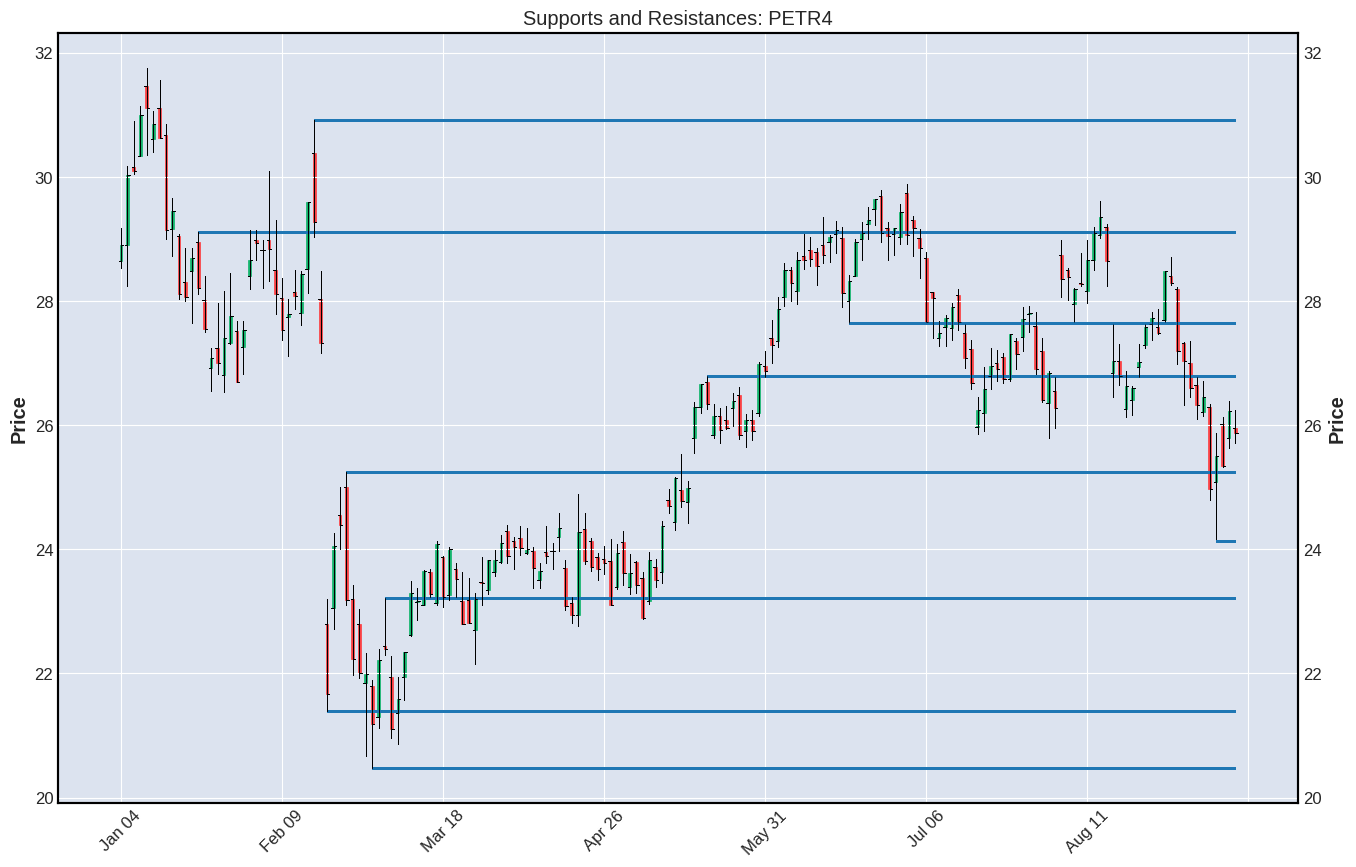

In [11]:
#Plotagem do gráfico
plot_all(coordinates)